<a href="https://colab.research.google.com/github/iamrestrepo/framingham-data-mining/blob/mr%2Fchanges-may-1st/Data_Mining_Project_Heart_Attack_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra // numerical data related
import pandas as pd # For everything tabular data related
import seaborn as sns #drawing graphs
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

from google.colab import drive

drive.mount('/content/gdrive');

Mounted at /content/gdrive


In [3]:
# df = pd.read_csv('framingham.csv') 
df = pd.read_csv('/content/gdrive/MyDrive/data_mining/framingham.csv')
df.head(20)

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,male,39,4.0,No,0.0,0.0,0,0,No,195.0,106.0,70.0,26.97,80.0,77.0,0
1,female,46,2.0,No,0.0,0.0,0,0,No,250.0,121.0,81.0,28.73,95.0,76.0,0
2,male,48,1.0,Yes,20.0,0.0,0,0,No,245.0,127.5,80.0,25.34,75.0,70.0,0
3,female,61,3.0,Yes,30.0,0.0,0,1,No,225.0,150.0,95.0,28.58,65.0,103.0,1
4,female,46,3.0,Yes,23.0,0.0,0,0,No,285.0,130.0,84.0,23.10,85.0,85.0,0
5,female,43,2.0,No,0.0,0.0,0,1,No,228.0,180.0,110.0,30.30,77.0,99.0,0
6,female,63,1.0,No,0.0,0.0,0,0,No,205.0,138.0,71.0,33.11,60.0,85.0,1
7,female,45,2.0,Yes,20.0,0.0,0,0,No,313.0,100.0,71.0,21.68,79.0,78.0,0
8,male,52,1.0,No,0.0,0.0,0,1,No,260.0,141.5,89.0,26.36,76.0,79.0,0
9,male,43,1.0,Yes,30.0,0.0,0,1,No,225.0,162.0,107.0,23.61,93.0,88.0,0


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Pre-Processing Data

In [5]:
#Checks for Duplicates
duplicate_df = df[df.duplicated()]
duplicate_df

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [6]:
df.isna().sum()
null = df[df.isna().any(axis=1)]
null

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,female,39,2.0,Yes,9.0,0.0,0,0,No,226.0,114.0,64.0,22.35,85.0,NaN,0
21,female,43,1.0,No,0.0,0.0,0,0,No,185.0,123.5,77.5,29.89,70.0,NaN,0
26,female,60,1.0,No,0.0,0.0,0,0,No,260.0,110.0,72.5,26.59,65.0,NaN,0
33,male,61,NaN,Yes,5.0,0.0,0,0,No,175.0,134.0,82.5,18.59,72.0,75.0,1
36,male,56,NaN,No,0.0,0.0,0,0,No,257.0,153.5,102.0,28.09,72.0,75.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,female,51,1.0,Yes,9.0,0.0,0,0,No,340.0,152.0,76.0,25.74,70.0,NaN,0
4229,female,51,3.0,Yes,20.0,0.0,0,1,No,251.0,140.0,80.0,25.60,75.0,NaN,0
4230,female,56,1.0,Yes,3.0,0.0,0,1,No,268.0,170.0,102.0,22.89,57.0,NaN,0
4235,female,48,2.0,Yes,20.0,NaN,0,0,No,248.0,131.0,72.0,22.00,84.0,86.0,0


In [7]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

Handling Null Valuea

In [8]:
#Missing values in Education
edu_missing = df[df['education'].isnull()].index
edu_missing

Int64Index([  33,   36,   72,  184,  213,  293,  305,  306,  319,  400,
            ...
            3764, 3868, 3873, 3943, 4012, 4082, 4098, 4121, 4122, 4138],
           dtype='int64', length=105)

In [9]:
#Drop All null values in Education.
df = df.drop(edu_missing)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4135 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              4135 non-null   object 
 1   age              4135 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4135 non-null   object 
 4   cigsPerDay       4108 non-null   float64
 5   BPMeds           4082 non-null   float64
 6   prevalentStroke  4135 non-null   int64  
 7   prevalentHyp     4135 non-null   int64  
 8   diabetes         4135 non-null   object 
 9   totChol          4086 non-null   float64
 10  sysBP            4135 non-null   float64
 11  diaBP            4135 non-null   float64
 12  BMI              4117 non-null   float64
 13  heartRate        4134 non-null   float64
 14  glucose          3755 non-null   float64
 15  TenYearCHD       4135 non-null   int64  
dtypes: float64(9), int64(4), object(3)
memory usage: 549.2+ KB


Ennumerating Strings/Objects by converting to Binary

In [11]:
#Turning Yes/No values to Binary
df = df.replace(['Yes'],1)
df = df.replace(['No'],0)

In [12]:
#Turning Male and Female into Binary
df['Sex'] = (df['Sex'] == 'male').astype(int)

In [13]:
df.head()

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4135 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              4135 non-null   int64  
 1   age              4135 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4135 non-null   int64  
 4   cigsPerDay       4108 non-null   float64
 5   BPMeds           4082 non-null   float64
 6   prevalentStroke  4135 non-null   int64  
 7   prevalentHyp     4135 non-null   int64  
 8   diabetes         4135 non-null   int64  
 9   totChol          4086 non-null   float64
 10  sysBP            4135 non-null   float64
 11  diaBP            4135 non-null   float64
 12  BMI              4117 non-null   float64
 13  heartRate        4134 non-null   float64
 14  glucose          3755 non-null   float64
 15  TenYearCHD       4135 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 549.2 KB


In [15]:
# Null values in Cigs per day are non smokers.
cigarette_index = df[df['cigsPerDay'].isnull()].index
cigarette_index

Int64Index([ 131,  139, 1046, 1292, 1347, 1451, 1497, 1610, 1625, 1870, 1963,
            1980, 2405, 2513, 3021, 3094, 3106, 3108, 3156, 3177, 3309, 3432,
            3579, 3715, 3847, 3924, 3942],
           dtype='int64')

In [16]:
current_smoke_status = []
for i in cigarette_index:
   current_smoke_status.append(df['currentSmoker'][i])

In [17]:
current_smoke_status

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [18]:
smokers = df[df['currentSmoker'] == 1].index
smokers

Int64Index([   2,    3,    4,    7,    9,   12,   14,   15,   16,   17,
            ...
            4224, 4225, 4227, 4229, 4230, 4233, 4234, 4235, 4236, 4239],
           dtype='int64', length=2046)

In [19]:
cigarettes_by_smokers = []
for i in smokers:
     if df['cigsPerDay'][i] != 'nan':
        cigarettes_by_smokers.append(df['cigsPerDay'][i])

In [20]:
len(cigarettes_by_smokers)

2046

In [21]:
import statistics

smoker_median = statistics.median(cigarettes_by_smokers)
smoker_median

20.0

In [22]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(smoker_median)

In [23]:
df.isnull().sum()

Sex                  0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             49
sysBP                0
diaBP                0
BMI                 18
heartRate            1
glucose            380
TenYearCHD           0
dtype: int64

In [24]:
BP_missing_index = df[df['BPMeds'].isnull()].index
BP_missing_index

Int64Index([  49,   77,  193,  245,  314,  395,  421,  765,  769,  797,  998,
            1002, 1044, 1104, 1122, 1177, 1206, 1284, 1301, 1566, 1573, 1616,
            1721, 1857, 1861, 1913, 1983, 1985, 1986, 2002, 2074, 2120, 2173,
            2181, 2367, 2608, 2645, 2738, 2835, 2943, 3226, 3313, 3373, 3375,
            3526, 3644, 3737, 3791, 3816, 4008, 4139, 4162, 4235],
           dtype='int64')

In [25]:
for i in BP_missing_index:
    if ( df['sysBP'][i] > 140 or df['diaBP'][i] > 90 ):
        df.loc[i,'BPMeds'] = 1.0  
    else:
        df.loc[i,'BPMeds'] = 0.0

In [26]:
df['totChol'] = df['totChol'].fillna(round(df['totChol'].mean()))

In [27]:
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())


In [28]:
df['glucose'] = df['glucose'].fillna(round(df['glucose'].mean()))

In [29]:
HR_missing_index = df[df['heartRate'].isnull()].index
HR_missing_index

Int64Index([689], dtype='int64')

In [30]:
df['heartRate'] = df['heartRate'].fillna(round(df['heartRate'].mean()))


In [31]:
df.isnull().sum()

Sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

EDA : Exploratory Data Analysis Begins

In [32]:
#Education Doesn't Have Any Significance. So, it will be dropped
df.drop('education', axis=1, inplace=True)

In [33]:
#Prints 2nd Row
print( 'Shape of Heart Prediction: {}'.format(df.shape))
print (df.loc[1])

Shape of Heart Prediction: (4135, 15)
Sex                  0.00
age                 46.00
currentSmoker        0.00
cigsPerDay           0.00
BPMeds               0.00
prevalentStroke      0.00
prevalentHyp         0.00
diabetes             0.00
totChol            250.00
sysBP              121.00
diaBP               81.00
BMI                 28.73
heartRate           95.00
glucose             76.00
TenYearCHD           0.00
Name: 1, dtype: float64


In [34]:
df.describe()

,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000
mean,0.427328,49.552358,0.494800,9.104474,0.034341,0.006046,0.311245,0.025635,236.642080,132.369287,82.876663,25.777345,75.922854,81.943652,0.151874
std,0.494750,8.562421,0.500033,11.920829,0.182126,0.077530,0.463059,0.158062,43.910468,22.075401,11.952176,4.074079,12.046881,22.855967,0.358942
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,143.750000,89.500000,27.985000,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [35]:
df.tail()


,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,82.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efece80eed0>,
      dtype=object)

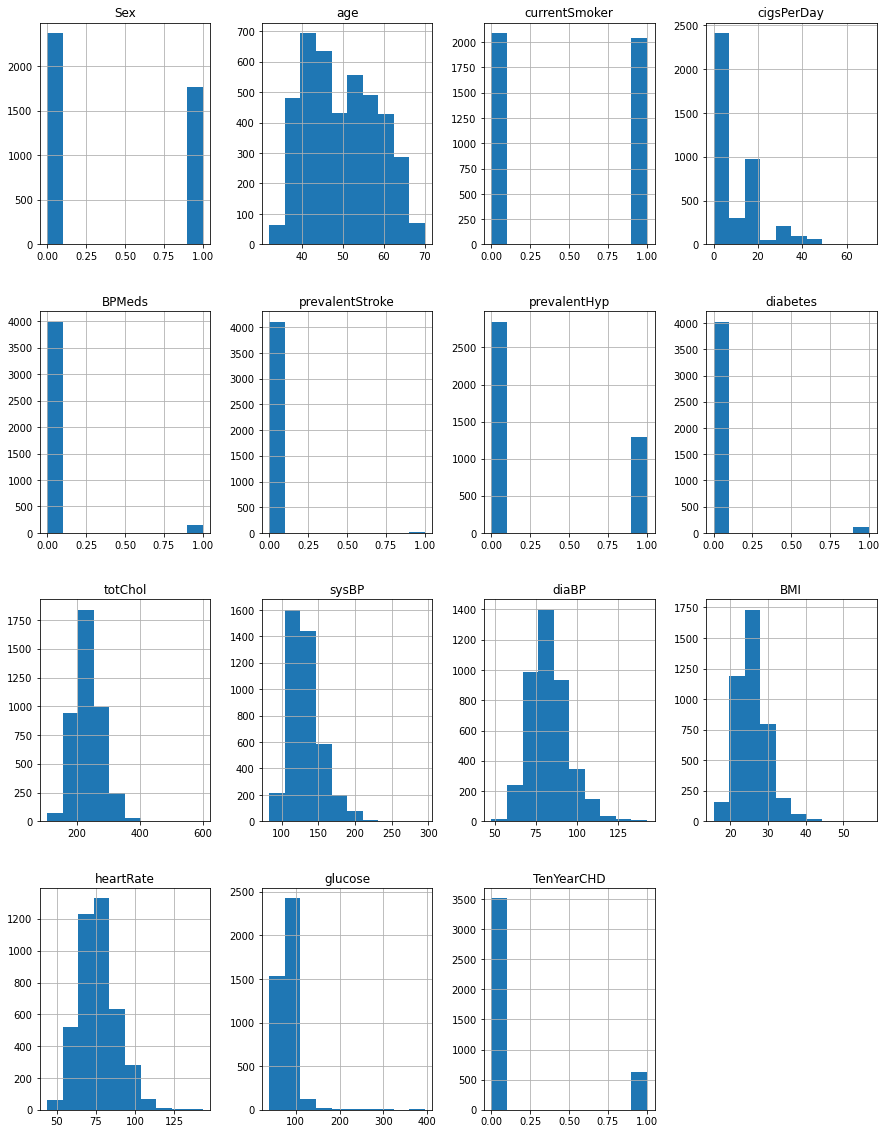

In [36]:
#Histograms of every column
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

Streaming output truncated to the last 5000 lines.
3359     63.0
3360     62.0
3361     84.0
3362     62.0
3363     90.0
3364     82.0
3365     76.0
3366     99.0
3367     78.0
3368     95.0
3369    103.0
3370     63.0
3371     86.0
3372     98.0
3373     82.0
3374     97.0
3375     77.0
3376     76.0
3377     60.0
3378     78.0
3379     75.0
3380     82.0
3381     96.0
3382     90.0
3383     82.0
3384     68.0
3385     74.0
3386     82.0
3387     76.0
3388     70.0
3389     70.0
3390     74.0
3391    113.0
3392     74.0
3393     47.0
3394     70.0
3395     73.0
3396     76.0
3397     65.0
3398     73.0
3399     87.0
3400     66.0
3401     83.0
3402     83.0
3403     78.0
3404     87.0
3405     69.0
3406     76.0
3407     98.0
3408     82.0
3409     84.0
3410     77.0
3411     93.0
3412     65.0
3413     76.0
3414     83.0
3415     77.0
3416     76.0
3417     71.0
3418    103.0
3419     67.0
3420     77.0
3421     68.0
3422     82.0
3423     85.0
3424     80.0
3425    102.0
3426     80

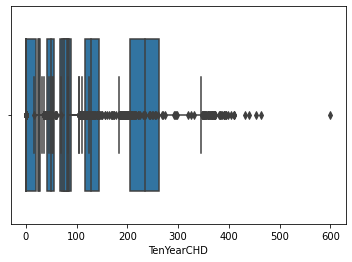

In [37]:
#IDENTIFY AND REMOVE OUTLIERS
#identify outliers using BoxPlot for each variable
from matplotlib.cbook import boxplot_stats

#initial shape
print(df.shape) 
# graph outliers for all columns in just one graph with axis x = TenYearCHD
for i in df.columns:
  sns.boxplot(x=df[i], width=0.7)
#outliers
  outliers = [y for stat in boxplot_stats(df[i]) for y in stat['fliers']]
  if len(outliers) > 1:
    print(df[i])
    # df.drop(df[df[i] < 25].index, inplace = True)
    # print("Total Outliers for " + i + '=' , len(outliers))
    # print("Outliers for " + i + '=' , outliers)


#final shape
print(df.shape)

#get indexes of outliers for each variable (outliers.includes(item['hearRate']))
#drop those items
# dataframe.drop( row_index, inplace = True

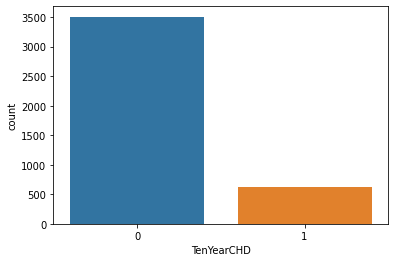

In [38]:
#Histogram of Target Variable
sns.countplot(x='TenYearCHD',data=df)

In [ ]:
sns.pairplot(data=df)

In [ ]:
pd.crosstab(df.age,df.TenYearCHD).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.pointplot(x=df.age,y=df.prevalentStroke,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Stroke Prevalence',fontsize = 15,color='blue')
plt.title('Age vs Stroke Prevalence',fontsize = 15,color='blue')
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.pointplot(x=df.cigsPerDay,y=df.prevalentStroke,color='red',alpha=0.8)
plt.xlabel('Cigs per Day',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Stroke Prevalence',fontsize = 15,color='blue')
plt.title('Cigs per Day vs Stroke Prevalence',fontsize = 15,color='blue')
plt.grid()
plt.show()

In [ ]:
samp=df.sample(frac=0.5, replace=True, random_state=1)
y= samp['BMI']
x= samp['age']
plt.scatter(x, y)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Simple Scatter plot')
plt.xlabel('X - value')
plt.ylabel('Y - value')
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.pointplot(x=df.age,y=df.prevalentHyp,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('HyperTension Prevalence',fontsize = 15,color='blue')
plt.title('Age vs HyperTension Prevalence',fontsize = 15,color='blue')
plt.grid()
plt.show()